In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## Import covariance matrix

In [2]:
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

In [3]:
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

# have a look at the data
data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [4]:
# extract only the numeric data
numberDataset = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
dataMat = numberDataset.drop(['state','fold'],axis=1).values
dataMat

array([[0.19, 0.33, 0.02, ..., 0.2 , 0.32, 0.2 ],
       [0.  , 0.16, 0.12, ..., 0.45, 0.  , 0.67],
       [0.  , 0.42, 0.49, ..., 0.02, 0.  , 0.43],
       ...,
       [0.16, 0.37, 0.25, ..., 0.18, 0.91, 0.23],
       [0.08, 0.51, 0.06, ..., 0.33, 0.22, 0.19],
       [0.2 , 0.78, 0.14, ..., 0.05, 1.  , 0.48]])

In [5]:
# dataMat.shape
datamean = np.mean(dataMat, axis=0) # column별 mean

# mean-centering
dataMat_mc = dataMat - datamean

In [6]:
cov = (dataMat_mc.T @ dataMat_mc) / (dataMat_mc.shape[0]-1)
cov

array([[ 0.01610509, -0.00095881,  0.00743543, ...,  0.0078588 ,
         0.01422331,  0.01085579],
       [-0.00095881,  0.02680317, -0.00278454, ..., -0.00193146,
        -0.00371296, -0.00133207],
       [ 0.00743543, -0.00278454,  0.06423288, ...,  0.008535  ,
         0.0158847 ,  0.03727496],
       ...,
       [ 0.0078588 , -0.00193146,  0.008535  , ...,  0.0524661 ,
         0.01137541,  0.00820928],
       [ 0.01422331, -0.00371296,  0.0158847 , ...,  0.01137541,
         0.05775768,  0.01952064],
       [ 0.01085579, -0.00133207,  0.03727496, ...,  0.00820928,
         0.01952064,  0.05428196]])

## [Problem 6-1]

- $C$: Covariance matrix
- $S$: Diagonal matrix (sd의 inverse)

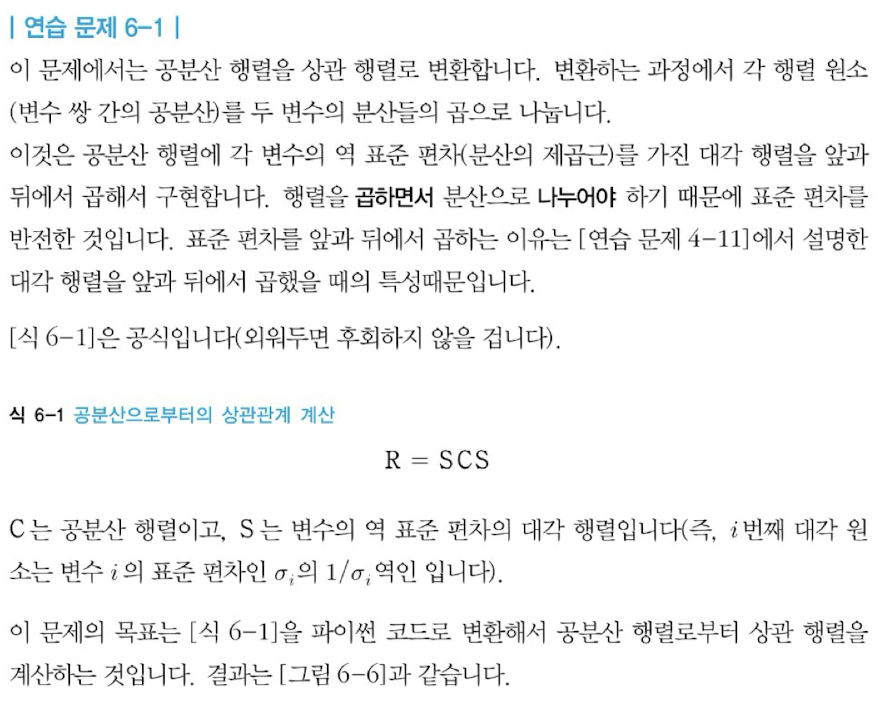

In [14]:
C = cov
C

(100, 100)

In [8]:
S = np.diag(np.diag(1/np.sqrt(C)))
S

<ipython-input-8-92a00e985250>:1: RuntimeWarning: invalid value encountered in sqrt
  S = np.diag(np.diag(1/np.sqrt(C)))


array([[7.87985844, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 6.10811117, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.945675  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 4.36576753, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 4.16097518,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        4.29212362]])

In [9]:
R = S @ C @ S
R

array([[ 1.        , -0.04614841,  0.23117774, ...,  0.27035553,
         0.46635229,  0.36715738],
       [-0.04614841,  1.        , -0.06710914, ..., -0.05150557,
        -0.09436752, -0.0349226 ],
       [ 0.23117774, -0.06710914,  1.        , ...,  0.14702299,
         0.26079264,  0.63126363],
       ...,
       [ 0.27035553, -0.05150557,  0.14702299, ...,  1.        ,
         0.20664393,  0.15382885],
       [ 0.46635229, -0.09436752,  0.26079264, ...,  0.20664393,
         1.        ,  0.34862726],
       [ 0.36715738, -0.0349226 ,  0.63126363, ...,  0.15382885,
         0.34862726,  1.        ]])

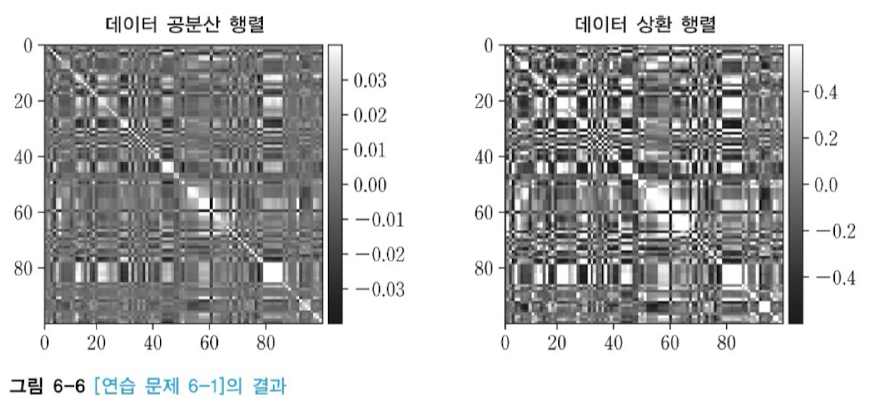

In [10]:
clim = np.max(np.abs(C)) * .2

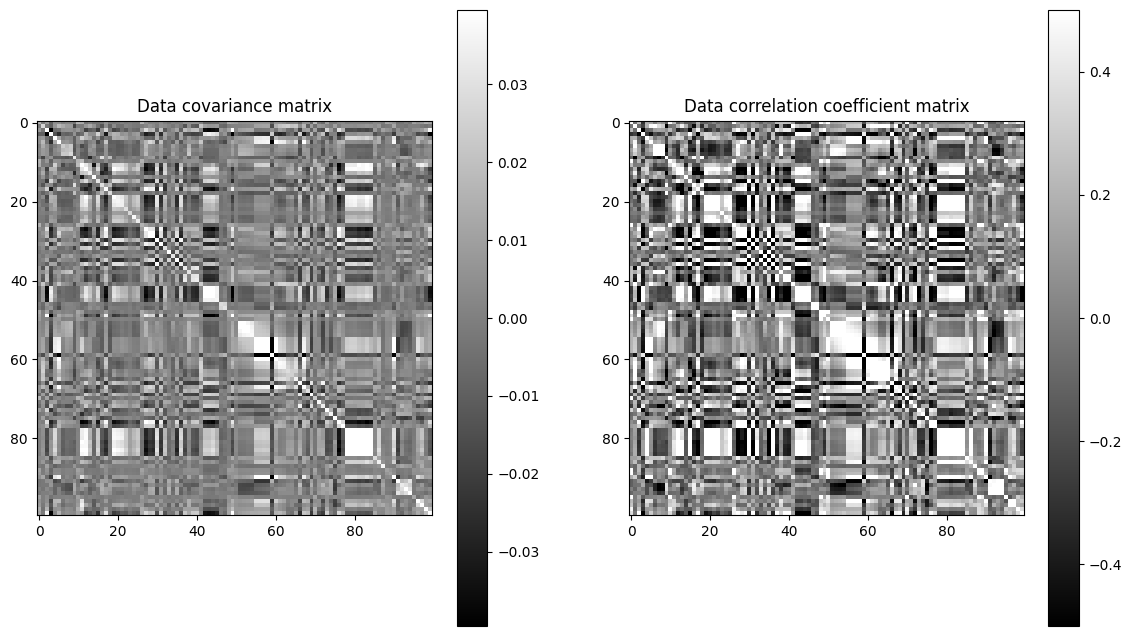

In [11]:
plt.figure(figsize = (14, 8))

plt.subplot(1, 2, 1)
plt.imshow(C, vmin=-clim, vmax=clim, cmap='gray')
plt.colorbar()  # 색상 바 추가
plt.title("Data covariance matrix")

plt.subplot(1, 2, 2)
plt.imshow(R, vmin=-.5, vmax=.5, cmap='gray')
plt.colorbar()  # 색상 바 추가
plt.title("Data correlation coefficient matrix")

plt.show()

## [Problem 6-2]

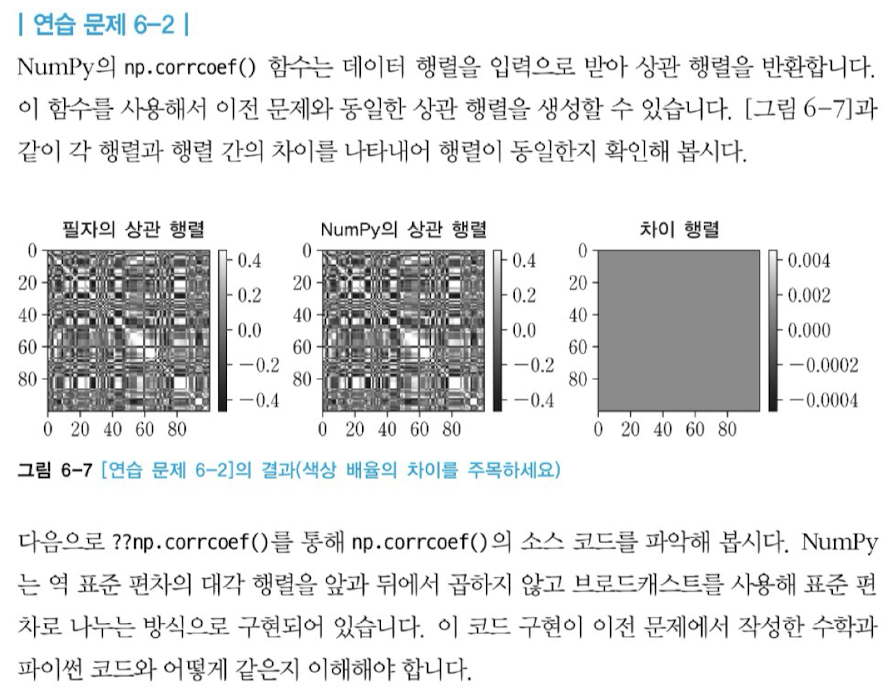

### `np.corrcoef()`를 통한 corrmat 생성
- [6-1]과 비교

In [23]:
dataMat.shape # 각 행이 관측치, 각 열이 변수인 상태

(1994, 100)

In [34]:
R_2 = np.corrcoef(dataMat.T) # np.corrcoef()안에 들어가는 인자는 '각 행이 변수', '각 열이 관측치'인 상태를 가정 -> wide matrix를 넣어줘야 해서 transpose

# 대안
# R_2 = np.corrcoef(dataMat, rowvar = False)

R_2.shape

(100, 100)

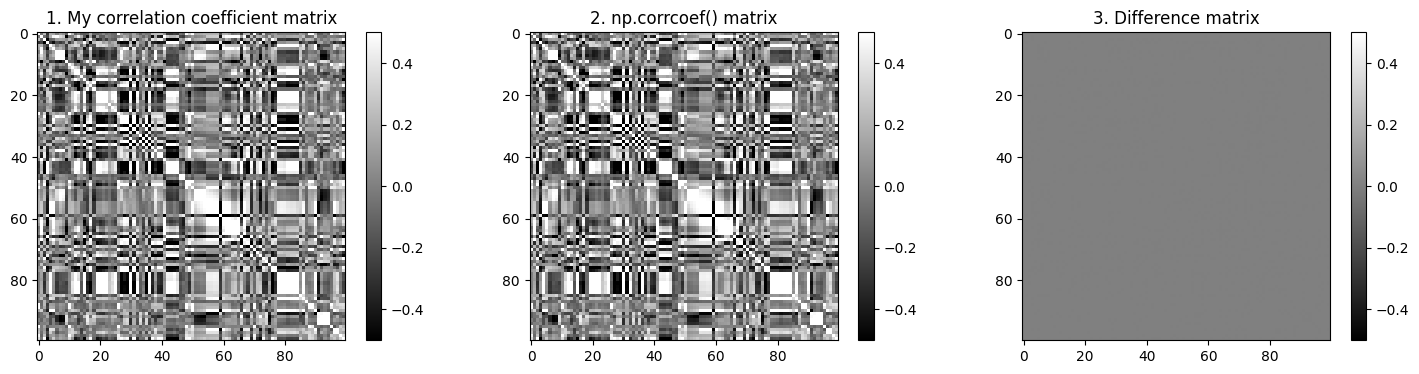

In [28]:
plt.figure(figsize = (18, 4))

plt.subplot(1, 3, 1)
plt.imshow(R, vmin=-.5, vmax=.5, cmap='gray')
plt.colorbar()  # 색상 바 추가
plt.title("1. My correlation coefficient matrix")

plt.subplot(1, 3, 2)
plt.imshow(R_2, vmin=-.5, vmax=.5, cmap='gray')
plt.colorbar()  # 색상 바 추가
plt.title("2. np.corrcoef() matrix")

plt.subplot(1, 3, 3)
plt.imshow(R-R_2, vmin=-.5, vmax=.5, cmap='gray')
plt.colorbar()  # 색상 바 추가
plt.title("3. Difference matrix")

plt.show()

### `??np.corrcoef()`를 통해 소스 코드 파악
> 역 표준편차의 대각 행렬을 앞과 뒤에서 곱 X

> <-> 브로드캐스트를 사용해, 표준 편차로 나눔

In [35]:
?np.corrcoef
?np.cov

$R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} C_{jj} } }$

In [61]:
x = np.random.randn(3,3)

In [62]:
c = np.cov(x)
c

array([[1.73028392, 1.76954026, 0.62920776],
       [1.76954026, 1.81232455, 0.59426784],
       [0.62920776, 0.59426784, 1.14722189]])

In [56]:
# a_col = np.array([[0.5],[0.5],[0.5]]) # 열벡터
# c/a_col # 모든 element에 /0.5
# c/a_col.T # 이것도 열벡터랑 마찬가진데?

array([[ 0.03242663, -0.11555336, -0.08640492, -0.12035305,  0.19596411,
         0.03913003],
       [-0.11555336,  0.77219457,  0.43178368,  0.93135601, -0.23621206,
         0.24341232],
       [-0.08640492,  0.43178368,  0.27281414,  0.49339897, -0.36334127,
         0.02732162],
       [-0.12035305,  0.93135601,  0.49339897,  1.14721967, -0.08307709,
         0.38852154],
       [ 0.19596411, -0.23621206, -0.36334127, -0.08307709,  1.77677536,
         0.72735548],
       [ 0.03913003,  0.24341232,  0.02732162,  0.38852154,  0.72735548,
         0.45390659]])

In [63]:
d = np.diag(c)
d

array([1.73028392, 1.81232455, 1.14722189])

In [64]:
stddev = np.sqrt(d.real) # real은 왜 해주는 걸까?
stddev

array([1.31540257, 1.34622604, 1.07108445])

- **d.real을 사용하는 이유**

  : 공분산 행렬의 대각 원소(분산 값)가 복소수(complex number)일 가능성이 있는 경우, 그 값의 실수 부분만을 사용하기 위해서입니다.
  - 일반적인 데이터 분석에서는 공분산 행렬이 실수 값만으로 이루어지지만, 복소수 데이터를 처리할 때에는 분산 값도 복소수가 될 수 있습니다. 이런 경우에는 분산이나 표준편차를 계산할 때, 실수 부분만 사용하도록 하는 것이 일반적입니다.

In [66]:
c /= c/stddev[:, None] # 열벡터
stddev[:, None].shape
stddev[None, :].shape
c /= c/stddev[None, :] # 행벡터

array([[1.31540257, 1.34524616, 0.47833855],
       [1.31444513, 1.34622604, 0.44143244],
       [0.58744925, 0.55482819, 1.07108445]])

In [68]:
c/stddev[None, :] # 행벡터

array([[1.31540257, 1.34622604, 1.07108445]])

### None을 통한 브로드 캐스팅 방식에 대한 예시
```python
# 2x3 배열 c
c = np.array([[1, 2, 3],
              [4, 5, 6]])

# 1차원 배열 stddev
stddev = np.array([1, 2, 3])

# stddev[:, None] (열 벡터로 변환)
result1 = c / stddev[:, None]
# 결과: 각 열에 대해 나눔
# [[1, 2, 3],
#  [2, 2.5, 3]]

# stddev[None, :] (행 벡터로 변환)
result2 = c / stddev[None, :]
# 결과: 각 행에 대해 나눔
# [[1, 1, 1],
#  [4, 2.5, 2]]

```

## [Problem 6-3]

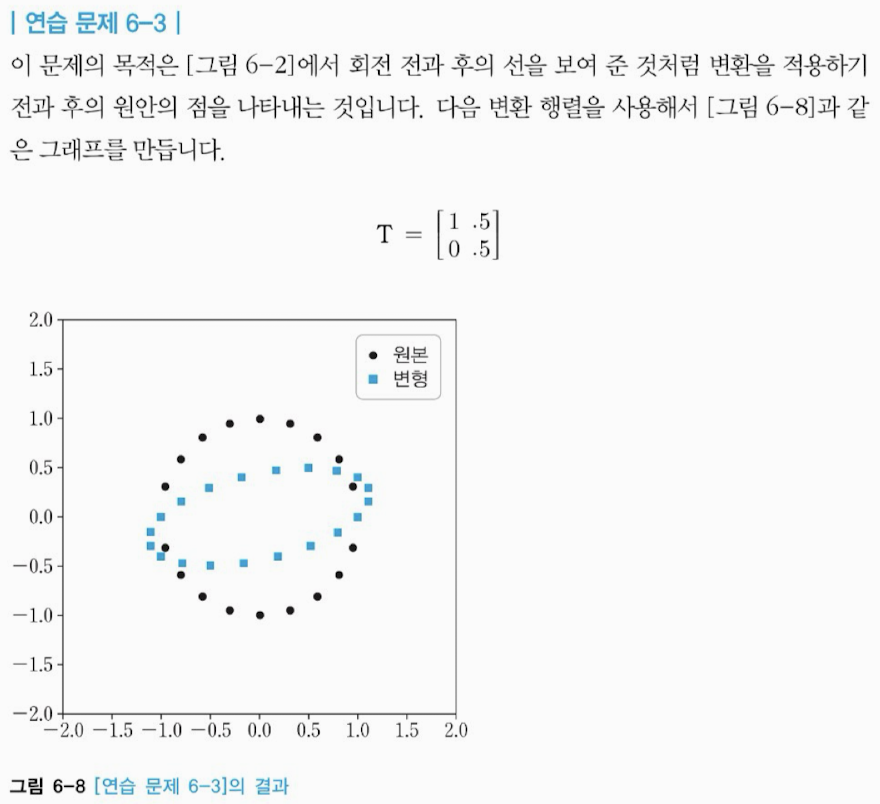

In [73]:
# 원본을 어떻게 만들지
# 원의 방정식 꼴이니까, \theta를 만들자
# 총 20개, 360도니까 18도씩

theta = np.linspace(0, 360 ,21)
theta

array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.,
       198., 216., 234., 252., 270., 288., 306., 324., 342., 360.])

In [74]:
point_origin = np.array([np.cos(theta), np.sin(theta)])
point_origin

array([[ 1.        ,  0.66031671, -0.12796369, -0.82930983, -0.96725059,
        -0.44807362,  0.3755096 ,  0.94398414,  0.8711474 ,  0.20648223,
        -0.59846007, -0.99682859, -0.71798508,  0.0486335 ,  0.78221211,
         0.98438195,  0.51779559, -0.30056379, -0.91473018, -0.90745945,
        -0.28369109],
       [ 0.        , -0.75098725, -0.99177885, -0.55878905,  0.25382336,
         0.89399666,  0.92681851,  0.32999083, -0.49102159, -0.97845035,
        -0.80115264, -0.07957859,  0.69605849,  0.99881669,  0.62301221,
        -0.17604595, -0.85550437, -0.95376171, -0.40406522,  0.42013968,
         0.95891572]])

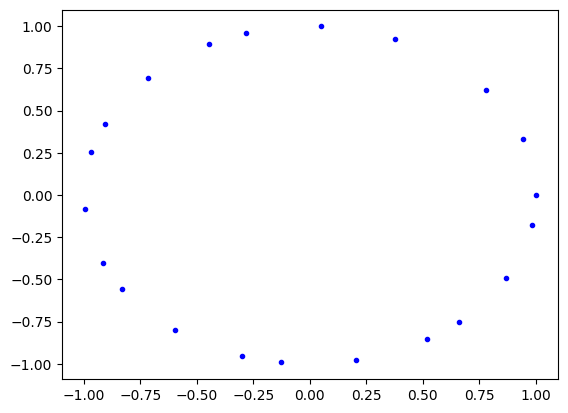

In [78]:
plt.plot(point_origin[0], point_origin[1], 'b.') # good

In [69]:
T = np.array([[1, .5],
              [0, 0.5]])
T

array([[1. , 0.5],
       [0. , 0.5]])

In [82]:
point_trans = T @ point_origin
point_trans

array([[ 1.00000000e+00,  2.84823085e-01, -6.23853116e-01,
        -1.10870436e+00, -8.40338907e-01, -1.07528433e-03,
         8.38918850e-01,  1.10897955e+00,  6.25636604e-01,
        -2.82742946e-01, -9.99036387e-01, -1.03661789e+00,
        -3.69955840e-01,  5.48041846e-01,  1.09371822e+00,
         8.96358977e-01,  9.00434033e-02, -7.77444650e-01,
        -1.11676279e+00, -6.97389606e-01,  1.95766770e-01],
       [ 0.00000000e+00, -3.75493623e-01, -4.95889427e-01,
        -2.79394524e-01,  1.26911681e-01,  4.46998332e-01,
         4.63409253e-01,  1.64995413e-01, -2.45510797e-01,
        -4.89225175e-01, -4.00576318e-01, -3.97892958e-02,
         3.48029244e-01,  4.99408346e-01,  3.11506106e-01,
        -8.80229732e-02, -4.27752185e-01, -4.76880857e-01,
        -2.02032610e-01,  2.10069841e-01,  4.79457862e-01]])

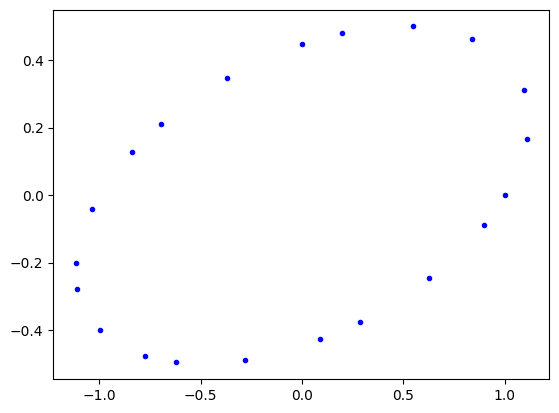

In [83]:
plt.plot(point_trans[0], point_trans[1], 'b.') # good

### visualization

<function matplotlib.pyplot.show(close=None, block=None)>

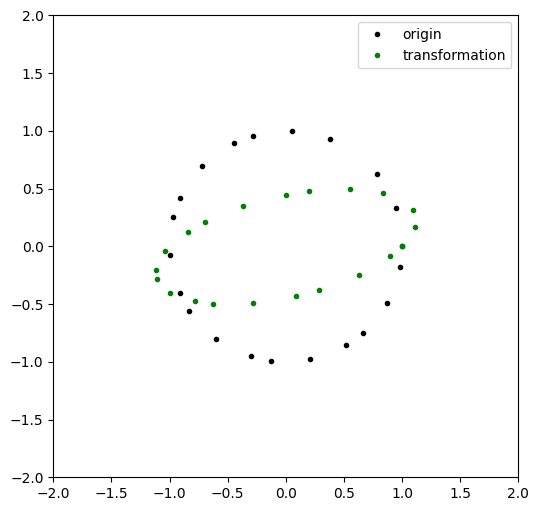

In [90]:
plt.figure(figsize = (6, 6))

plt.plot(point_origin[0], point_origin[1], 'k.', label = 'origin')
plt.plot(point_trans[0], point_trans[1], 'g.', label = 'transformation')
plt.legend(loc = 'upper right')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.show